# Advanced Epi II: Introduction to Python
## Lesson 3
- Explorative Datenanalyse
- SciPy
---
Before applying machine learning or statistics, we need to understand and clean our data. For this, we do an **exploratory data analysis**. Why is this important?
- Detects issues early (e.g., missing values, outliers, duplicates).
- Gives insight into distributions & patterns.
- Helps with feature selection (which variables matter?).

Here, we go beyond `.info()` and use powerful Pandas functions to summarize data:

In [68]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Before working with a dataset, it’s important to **explore** its structure:

| Function | Description |
|----------|-------------|
| `df.head(n)` | Displays the first `n` rows (default: 5). |
| `df.tail(n)` | Displays the last `n` rows. |
| `df.info()` | Summary of the DataFrame (column types, non-null values). |
| `df.describe()` | Descriptive statistics for numeric columns. |
| `df.shape` | Returns the number of rows and columns. |
| `df.dtypes` | Shows the data types of each column. |

You can access specific parts of the DataFrame using these methods:

In [2]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df["gender"].head()

0      Male
1    Female
2      Male
3    Female
4    Female
Name: gender, dtype: object

In [5]:
df[["gender", "age"]].head()

,gender,age
0,Male,67.0
1,Female,61.0
2,Male,80.0
3,Female,49.0
4,Female,79.0


In [7]:
# Check data types
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [8]:
# Count unique values per column of the whole dataset
print(df.nunique())

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [9]:
# Count occurrences of each category in a column
print(df["smoking_status"].value_counts())

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Before analyzing data, we need to ensure data consistency by checking for:
- Duplicate records (often occur due to data collection errors or systematic logging issues)
- Incorrect data types
- Unexpected unique values

In [10]:
import numpy as np

df_new = pd.DataFrame(np.repeat(df.values, 3, axis=0))
df_new

,0,1,2,3,4,5,6,7,8,9,10,11
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
3,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15325,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
15326,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
15327,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0
15328,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [11]:
# Check for duplicate rows
print(df_new.duplicated().sum())

10220


In [13]:
df_new.duplicated()

0        False
1         True
2         True
3        False
4         True
         ...  
15325     True
15326     True
15327    False
15328     True
15329     True
Length: 15330, dtype: bool

In [12]:
# Display duplicate rows
print(df_new[df_new.duplicated()])

          0       1     2  3  4    5              6      7       8     9   \
1       9046    Male  67.0  0  1  Yes        Private  Urban  228.69  36.6   
2       9046    Male  67.0  0  1  Yes        Private  Urban  228.69  36.6   
4      51676  Female  61.0  0  0  Yes  Self-employed  Rural  202.21   NaN   
5      51676  Female  61.0  0  0  Yes  Self-employed  Rural  202.21   NaN   
7      31112    Male  80.0  0  1  Yes        Private  Rural  105.92  32.5   
...      ...     ...   ... .. ..  ...            ...    ...     ...   ...   
15323  19723  Female  35.0  0  0  Yes  Self-employed  Rural   82.99  30.6   
15325  37544    Male  51.0  0  0  Yes        Private  Rural  166.29  25.6   
15326  37544    Male  51.0  0  0  Yes        Private  Rural  166.29  25.6   
15328  44679  Female  44.0  0  0  Yes       Govt_job  Urban   85.28  26.2   
15329  44679  Female  44.0  0  0  Yes       Govt_job  Urban   85.28  26.2   

                    10 11  
1      formerly smoked  1  
2      formerly smo

In [14]:
# Remove duplicates (keeping the first occurrence)
df_new = df_new.drop_duplicates()

In [15]:
df_new

,0,1,2,3,4,5,6,7,8,9,10,11
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
3,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
6,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
9,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
12,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
15318,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
15321,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
15324,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
pd.DataFrame.reset_index(df_new, drop=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Indexing
You can move a column from the body of the DataFrame to the index:
- The values in the index don't need to be unique.

In [51]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,M,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,F,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,M,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,F,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,F,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
df.set_index("id", inplace=True)

KeyError: "None of ['id'] are in the columns"

In [54]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,M,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,F,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,M,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,F,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,F,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [55]:
df.reset_index(inplace=True)

In [56]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,M,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,F,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,M,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,F,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,F,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [69]:
df.set_index(["id", "smoking_status"], inplace=True)

In [58]:
df.head()

,,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
id,smoking_status,,,,,,,,,,
9046,formerly smoked,M,67.0,0,1,Yes,Private,Urban,228.69,36.6,1
51676,never smoked,F,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1
31112,never smoked,M,80.0,0,1,Yes,Private,Rural,105.92,32.5,1
60182,smokes,F,49.0,0,0,Yes,Private,Urban,171.23,34.4,1
1665,never smoked,F,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1


In [94]:
df.reset_index(inplace=True)

In [84]:
df.set_index(["gender", "smoking_status"], inplace=True)
df.sort_index(level="smoking_status", inplace=True)

In [85]:
df.head()

id   age  hypertension  heart_disease ever_married  \
gender smoking_status                                                          
Female Unknown         27419  59.0             0              0          Yes   
       Unknown         60491  78.0             0              0          Yes   
       Unknown         37937  75.0             0              1           No   
       Unknown         18587  76.0             0              0           No   
       Unknown         26015  66.0             0              0          Yes   

                           work_type Residence_type  avg_glucose_level   bmi  \
gender smoking_status                                                          
Female Unknown               Private          Rural              76.15   NaN   
       Unknown               Private          Urban              58.57  24.2   
       Unknown         Self-employed          Urban             109.78   NaN   
       Unknown               Private          Urban              89.96   NaN   
       Unknown         Self-employed          Urban             101.45   NaN   

                       stroke  
gender smoking_status          
Female Unknown              1  
       Unknown              1  
       Unknown              1  
       Unknown              1  
       Unknown              1

In [87]:
df.loc["Female", "formerly smoked"]

/var/folders/zc/7mjx7d5j2mj_t65nrcs40wkh0000gn/T/ipykernel_42655/4036389302.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc["Female", "formerly smoked"]


id   age  hypertension  heart_disease ever_married  \
gender smoking_status                                                           
Female formerly smoked  38047  65.0             0              0          Yes   
       formerly smoked    712  82.0             1              1           No   
       formerly smoked  24977  72.0             1              0          Yes   
       formerly smoked   1845  63.0             0              0          Yes   
       formerly smoked  47472  58.0             0              0          Yes   
...                       ...   ...           ...            ...          ...   
       formerly smoked  49773  78.0             0              0          Yes   
       formerly smoked  25102  51.0             0              0          Yes   
       formerly smoked  53478  40.0             0              0          Yes   
       formerly smoked  53525  72.0             0              0          Yes   
       formerly smoked  26214  63.0             0              0          Yes   

                            work_type Residence_type  avg_glucose_level   bmi  \
gender smoking_status                                                           
Female formerly smoked        Private          Rural             100.98  28.2   
       formerly smoked        Private          Rural              84.03  26.5   
       formerly smoked        Private          Rural              74.63  23.1   
       formerly smoked        Private          Urban              90.90   NaN   
       formerly smoked        Private          Urban             107.26  38.6   
...                               ...            ...                ...   ...   
       formerly smoked        Private          Urban             203.36  28.7   
       formerly smoked       Govt_job          Urban              95.16  42.7   
       formerly smoked        Private          Urban              89.61  41.2   
       formerly smoked        Private          Urban              83.89  33.1   
       formerly smoked  Self-employed          Rural              75.93  34.7   

                        stroke  
gender smoking_status           
Female formerly smoked       1  
       formerly smoked       1  
       formerly smoked       1  
       formerly smoked       1  
       formerly smoked       1  
...                        ...  
       formerly smoked       0  
       formerly smoked       0  
       formerly smoked       0  
       formerly smoked       0  
       formerly smoked       0  

[477 rows x 10 columns]

In [95]:
df.set_index(["id", "smoking_status"], inplace=True)
df.sort_index(level="id", inplace=True)
df.head()

,,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
id,smoking_status,,,,,,,,,,
67,formerly smoked,Female,17.0,0,0,No,Private,Urban,92.97,NaN,0
77,Unknown,Female,13.0,0,0,No,children,Rural,85.81,18.6,0
84,never smoked,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,0
91,never smoked,Female,42.0,0,0,No,Private,Urban,98.53,18.5,0
99,Unknown,Female,31.0,0,0,No,Private,Urban,108.89,52.3,0


In [96]:
df.loc[99]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,
Unknown,Female,31.0,0,0,No,Private,Urban,108.89,52.3,0


In [99]:
df.iloc[4]

gender                Female
age                     31.0
hypertension               0
heart_disease              0
ever_married              No
work_type            Private
Residence_type         Urban
avg_glucose_level     108.89
bmi                     52.3
stroke                     0
Name: (99, Unknown), dtype: object

### Understanding data distributions
Using `describe()` is a good start, but visualizing distributions gives better insights.

Checking skewness:
- Right-skewed (long right tail) → Many extreme high values (e.g., glucose levels in diabetics).
- Left-skewed (long left tail) → Many extreme low values (e.g., blood pressure in hypotension).

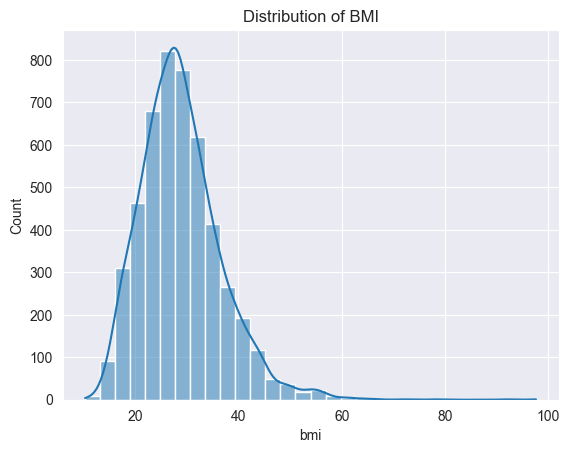

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of BMI
sns.histplot(df["bmi"], kde=True, bins=30)
plt.title("Distribution of BMI")
plt.show()

### Categorical Variables
Categorical variables often need cleaning before being useful.
Common Issues Found:
- Typos or inconsistent capitalization ("Male", "male ", " M").
- Unexpected categories (e.g., "Unknown" instead of NaN).

In [18]:
# Unique values for categorical columns
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [19]:
# Fix gender inconsistencies
df["gender"] = df["gender"].str.strip().str.lower().replace({"male": "M", "female": "F"})

In [21]:
df["gender"].head()

0    M
1    F
2    M
3    F
4    F
Name: gender, dtype: object

### Renaming columns

In [100]:
df.rename(columns={"gender": "sex"})

,,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
id,smoking_status,,,,,,,,,,
67,formerly smoked,Female,17.0,0,0,No,Private,Urban,92.97,NaN,0
77,Unknown,Female,13.0,0,0,No,children,Rural,85.81,18.6,0
84,never smoked,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,0
91,never smoked,Female,42.0,0,0,No,Private,Urban,98.53,18.5,0
99,Unknown,Female,31.0,0,0,No,Private,Urban,108.89,52.3,0
...,...,...,...,...,...,...,...,...,...,...,...
72911,smokes,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,0
72914,Unknown,Female,19.0,0,0,No,Private,Urban,90.57,24.2,0
72915,formerly smoked,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,0


In [101]:
df.rename(columns={"sex": "gender", "Residence_type": "Living_area"})

,,gender,age,hypertension,heart_disease,ever_married,work_type,Living_area,avg_glucose_level,bmi,stroke
id,smoking_status,,,,,,,,,,
67,formerly smoked,Female,17.0,0,0,No,Private,Urban,92.97,NaN,0
77,Unknown,Female,13.0,0,0,No,children,Rural,85.81,18.6,0
84,never smoked,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,0
91,never smoked,Female,42.0,0,0,No,Private,Urban,98.53,18.5,0
99,Unknown,Female,31.0,0,0,No,Private,Urban,108.89,52.3,0
...,...,...,...,...,...,...,...,...,...,...,...
72911,smokes,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,0
72914,Unknown,Female,19.0,0,0,No,Private,Urban,90.57,24.2,0
72915,formerly smoked,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,0


### Relationship analysis
Correlation and grouping methods help spot trends. Why is this useful?
- High correlations (>0.8) indicate redundant variables (e.g., BMI and weight).
- Negative correlations (e.g., age vs. physical_activity) can reveal trends.

In [22]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

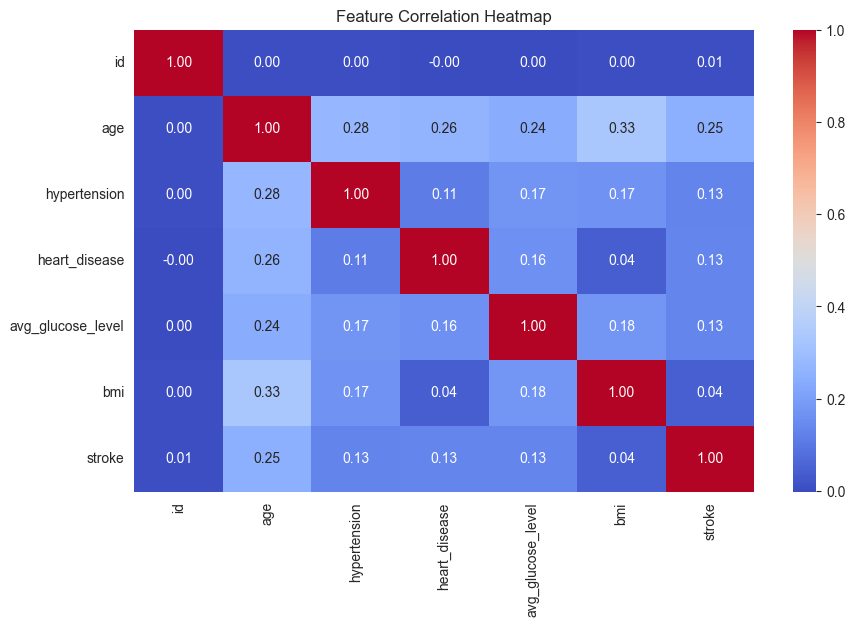

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Advanced filtering and querying

In [25]:
# Find all patients who are male, over 60, and have hypertension
df_filtered = df[(df["gender"] == "M") & (df["age"] > 60) & (df["hypertension"] == 1)]
df_filtered.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6,53882,M,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
17,34120,M,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
45,19824,M,76.0,1,0,Yes,Private,Rural,243.58,33.6,never smoked,1
51,15102,M,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1
58,58631,M,73.0,1,0,Yes,Self-employed,Urban,194.99,32.8,never smoked,1


You can also use `.query()`: allows you to select rows based on conditions, using natural language-style expression
- .query() is faster than boolean indexing because it uses numexpr, which optimizes calculations.
- Cleaner syntax, especially for complex conditions.

In [27]:
df_filtered = df.query("gender == 'M' and age > 60 and hypertension == 1")
df_filtered.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6,53882,M,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
17,34120,M,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
45,19824,M,76.0,1,0,Yes,Private,Rural,243.58,33.6,never smoked,1
51,15102,M,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1
58,58631,M,73.0,1,0,Yes,Self-employed,Urban,194.99,32.8,never smoked,1


In [35]:
# Find patients with extreme glucose levels
df[df["avg_glucose_level"] > df["avg_glucose_level"].quantile(0.99)].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
33,54401,M,80.0,0,1,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1
45,19824,M,76.0,1,0,Yes,Private,Rural,243.58,33.6,never smoked,1
122,13491,M,80.0,0,0,Yes,Private,Rural,259.63,31.7,smokes,1
123,44033,M,56.0,1,0,Yes,Private,Rural,249.31,35.8,never smoked,1
135,71279,F,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1
193,69112,M,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1
196,58267,M,70.0,1,0,Yes,Private,Rural,242.52,45.5,formerly smoked,1
220,20463,M,81.0,1,1,Yes,Private,Urban,250.89,28.1,smokes,1
243,40460,F,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
256,41413,F,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0


### Pivot tables and cross tabulation
`pd.crosstab()` is a useful function for **creating contingency tables**, which show the frequency distribution of two or more categorical variables.
- **Quickly summarize categorical relationships** (e.g., gender vs. stroke occurrence)
- **Works similarly to pivot tables but is optimized for frequency counts**
- **Supports aggregations like sum, mean, or normalization** (for complex aggregations, however, use `groupby()`)


In [ ]:
pd.crosstab(df['gender'], df['stroke'])

In [ ]:
pd.crosstab(df['gender'], df['stroke'], normalize=True)

In [36]:
pd.crosstab(df["gender"], df["smoking_status"], values=df["stroke"], aggfunc="mean") # compute cross tabulations

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
F,0.029904,0.071279,0.051261,0.042035
M,0.031073,0.088452,0.040724,0.068249
other,NaN,0.000000,NaN,NaN


- Stroke prevalence for smokers vs. non-smokers.
- Gender differences in stroke risk.

Both **`pivot_table()`** and **`groupby()`** are used for **grouping and aggregating** data in Pandas, but they serve slightly different purposes and have distinct advantages depending on the scenario.

**`groupby()`**:
- Groups data by one or more columns and **applies aggregation functions** (e.g., mean, sum, count).
- Returns a **grouped DataFrame** or **Series**, depending on the operation.
- More flexible than `pivot_table()` when handling **multiple aggregations** or applying **custom functions**.

**`pivot_table()`**
- Creates a **pivoted summary table** with values arranged in a **matrix format**.
- Similar to Excel's pivot tables.
- **Automatically handles missing values**, using an aggregation function (default: `mean`).
- More structured than `groupby()` for creating tables where one column’s values become headers.



In [37]:
df.pivot_table(index="gender", columns="work_type", values="bmi", aggfunc="mean") # summarize categorical variables

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
F,30.340104,26.054545,30.297713,29.750734,20.055000
M,30.806098,25.036364,30.322443,30.950000,20.022507
other,NaN,NaN,22.400000,NaN,NaN


- Analyzing BMI across occupations.
- Comparing disease prevalence between demographic groups.

In [ ]:
df.groupby(["gender", "work_type"]).agg({"bmi": "mean", "avg_glucose_level": "median"})

In [ ]:
df.pivot_table(values=["bmi", "avg_glucose_level"], index="gender", columns="work_type", aggfunc={"bmi": "mean", "avg_glucose_level": "median"})

### Exercise
In the following exercises, rewrite the given `groupby()` statements using `pivot_table()`:


In [ ]:
df.groupby(["gender", "work_type"])["bmi"].median()

In [ ]:
# Solution
df.pivot_table(values="bmi", index="gender", columns="work_type", aggfunc="median")

In [ ]:
df.groupby(["gender", "smoking_status"]).size()

In [ ]:
# Solution
df.pivot_table(values="id", index="gender", columns="smoking_status", aggfunc="count")

In [ ]:
df.groupby(["hypertension", "heart_disease"])["avg_glucose_level"].max()

In [ ]:
# Solution
df.pivot_table(values="avg_glucose_level", index="hypertension", columns="heart_disease", aggfunc="max")

In [ ]:
df.groupby(["hypertension", "heart_disease"]).agg({"avg_glucose_level": "max", "age": "mean"})

In [ ]:
# Solution
df.pivot_table(values=["avg_glucose_level", "age"], index="hypertension", columns="heart_disease", aggfunc={"avg_glucose_level": "max", "age": "mean"})

In [46]:
df.groupby(["gender", "work_type"]).apply(lambda x: (x["stroke"].sum() / len(x)), include_groups=False)#.reset_index(name="stroke_proportion")

gender  work_type    
F       Govt_job         0.057644
        Never_worked     0.000000
        Private          0.043330
        Self-employed    0.079365
        children         0.006135
M       Govt_job         0.038760
        Never_worked     0.000000
        Private          0.062393
        Self-employed    0.079365
        children         0.000000
other   Private          0.000000
dtype: float64

In [ ]:
# Solution
df.pivot_table(values="stroke", index="gender", columns="work_type", aggfunc=lambda x: x.sum() / len(x))

### Handling missing values
Missing values can arise due to:
- Data entry errors (e.g., patients forget to report BMI).
- Different data sources (e.g., some hospitals track certain metrics, others don’t).
- Sensor failures (e.g., device failed to record a glucose reading).

This leads to:
- Incorrect statistics (e.g., mean/median calculations may be distorted).
- Machine learning models fail if missing values are not handled properly.
- Biased results when certain groups have more missing data than others.

In [48]:
# Count missing values per column
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [49]:
# Calculate percentage of missing values
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


Rule of Thumb:
- If < 5% missing → Use imputation.
- If 5-30% missing → Consider imputation or removal based on context.
- If > 50% missing → Consider dropping the column.

Visualize missing data:

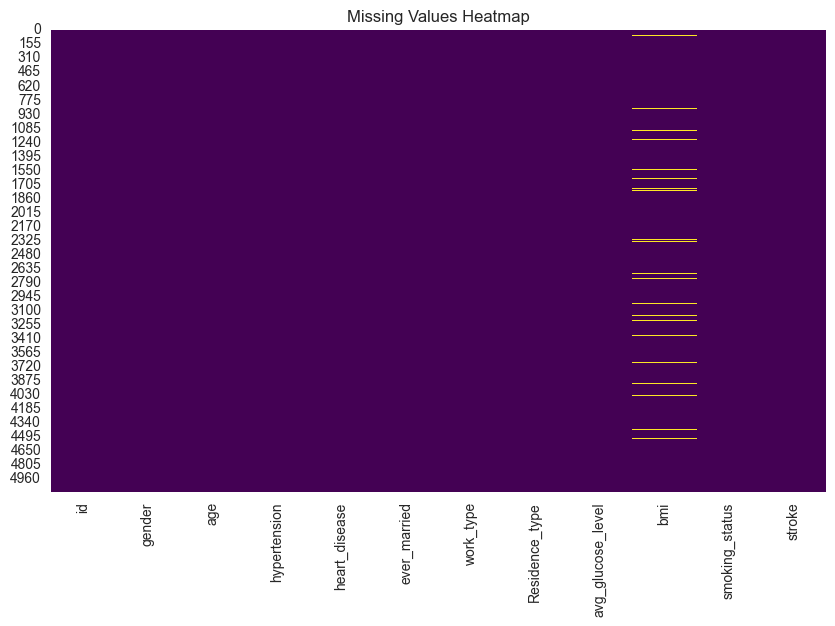

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### Handling Missing Values in Pandas

| **Method**                | **Use Case**                    | **Example Code**                               |
|---------------------------|--------------------------------|-----------------------------------------------|
| **Drop missing rows**     | If few missing values exist    | ```df.dropna()```                            |
| **Drop missing columns**  | If too many missing values     | ```df.drop(columns=["bmi"])```               |
| **Fill with mean/median** | For continuous data            | ```df["bmi"].fillna(df["bmi"].mean())```     |
| **Fill with mode**        | For categorical data           | ```df["gender"].fillna(df["gender"].mode()[0])``` |
| **Forward fill (`ffill`)**  | Time series data               | ```df.fillna(method="ffill")```              |
| **Backward fill (`bfill`)** | Time series data               | ```df.fillna(method="bfill")```              |
| **Interpolation**         | Smooth missing values          | ```df.interpolate()```                       |

In [ ]:
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())

In [ ]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)  # Mean imputation
df["bmi"].fillna(df["bmi"].median(), inplace=True)  # Median imputation

For categorical data, we use mode (most frequent value):

In [ ]:
df["smoking_status"].fillna(df["smoking_status"].mode()[0], inplace=True)

For time-series data, use previous/next values:

In [ ]:
df["glucose_level"].fillna(method="ffill", inplace=True)  # Forward fill
df["glucose_level"].fillna(method="bfill", inplace=True)  # Backward fill

Interpolation predicts missing values based on existing patterns:
- Gradually changing data, like weight trends over time.

In [ ]:
df["bmi"] = df["bmi"].interpolate()

### Handling missing data with Scikit-learn
Predictive imputation: when simple methods are insufficient, machine learning models can be used to predict missing values. For simple imputation, there are several strategies to compensate for missing values:

| Strategy | Description |
|----------|-------------|
| `mean` | Replaces missing values with the column mean |
| `median` | Uses the median instead of the mean |
| `most_frequent` | Fills missing values with the most common value in the column |
| `constant` | Replaces missing values with a constant value (e.g., 0 or "Unknown") |


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

# Identify missing values
print(df.isnull().sum())

# Simple Mean Imputation
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df['bmi'])

# Simple Median Imputation with multiple variables
imputer_median = SimpleImputer(strategy='median')
df[['bmi', 'avg_glucose_level']] = imputer_median.fit_transform(df[['bmi', 'avg_glucose_level']])

# Replace missing values with a constant value (e.g., 0)
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)
df[['bmi', 'avg_glucose_level']] = imputer_constant.fit_transform(df[['bmi', 'avg_glucose_level']])


print(df.isnull().sum())  # Check if missing values are filled

###  Advanced imputation

| **Method**             | **Advantage**                                       | **Disadvantage**                                 |
|-----------------------|--------------------------------------------------|---------------------------------------------|
| `KNNImputer`        | Uses similarity between data points               | Sensitive to scaling & large datasets     |
| `MICE` (Multiple Imputation) | Creates multiple imputed datasets to capture variability | Computationally expensive for large datasets |
| `IterativeImputer`  | Models relationships between variables            | Can be slow & requires well-prepared features |
| `Autoencoder`       | Captures non-linear relationships                  | Requires large datasets & model training  |
| `Bayesian Ridge`    | Probabilistic approach for robust predictions      | Assumes a prior distribution of data      |


`KNNImputer` is best for complex relationships in medical datasets, where missing `bmi`can be estimated using `age` and `avg_glucose_level`:

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df[['bmi', 'avg_glucose_level']] = knn_imputer.fit_transform(df[['bmi', 'avg_glucose_level']])

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5) 
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

`MICE` creates multiple versions of the data set with different imputations and takes into account uncertainties in the imputed values:
- The `mice` package in R is more popular

In [ ]:
from statsmodels.imputation.mice import MICEData

mice_data = MICEData(df)
df_imputed = mice_data.data  # access the imputed data set via .data


`IterativeImputer` suitable if the missing values are not randomly distributed and depend on other features. Works well for complex relationships between variables. Models relationships via regression:

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)
df[['bmi', 'avg_glucose_level']] = imputer.fit_transform(df[['bmi', 'avg_glucose_level']])


`BayesianRidge` suitable for cases in which a robust probabilistic estimate is required. It models missing values with probability distributions and takes uncertainty in the estimates into account:

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)
df[['bmi', 'avg_glucose_level']] = imputer.fit_transform(df[['bmi', 'avg_glucose_level']])


### Quiz: which method of imputing?

**Dataset 1**
| Household ID | Annual Income ($) |
|-------------|------------------|
| A01         | 50,000           |
| A02         | 45,000           |
| A03         | 120,000          |
| A04         | NaN              |
| A05         | 55,000           |


Solution: `median`

Reason: Income data is **often skewed due to high-income outliers**. Using the `median` instead of the `mean` prevents distortion from extreme values.


**Dataset 2**
| Employee ID | Job Title |
|------------|----------|
| 001        | Manager  |
| 002        | Analyst  |
| 003        | NaN      |
| 004        | Engineer |


Solution: `most_frequent`

Reason: Job titles are categorical. Using the most frequently occurring job title makes sense when missing values are **not missing at random**.


**Dataset 3**
| Customer ID | Satisfaction Score (1-10) |
|------------|-------------------------|
| C001       | 8                       |
| C002       | 7                       |
| C003       | NaN                     |
| C004       | 6                       |

Solution: `mean`

Reason: Satisfaction scores are usually on a **normal distribution**, making the mean a reasonable choice.


**Dataset 4**
| Student ID | Math Score | Science Score | Reading Score |
|------------|------------|---------------|---------------|
| 001        | 85         | NaN           | 78            |
| 002        | 90         | 88            | NaN           |
| 003        | NaN        | 92            | 80            |
| 004        | 78         | 85            | 76            |

Solution: `IterativeImputer` 

Reason: Missing values depend on multiple features in a **predictable** way, exam scores are likely correlated, meaning missing values can be estimated by modeling relationships between the subjects.

**Dataset 5**
| Patient ID | Age | Weight (kg) | Height (cm) |
|-----------|-----|------------|-------------|
| 101       | 25  | 68         | 175         |
| 102       | 30  | 75         | NaN         |
| 103       | 40  | 82         | 180         |
| 104       | 35  | NaN        | 178         |

Solution: `KNNImputer` 

Reason: Missing values can be estimated based on **similar patterns in other rows**. Height and weight values are **more similar among patients of the same age group**. Using `KNNImputer`, missing values can be estimated based on the closest matches.


### Dealing with outliers
We can detect outliers using:
- Visual methods (Boxplots, Histograms).
- Statistical methods (Z-score, IQR).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=df["bmi"])
plt.title("Boxplot of BMI")
plt.show()

In [ ]:
df["bmi"].hist(bins=30)
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

Interquartile Range (IQR) (For Skewed Data) is used when data is not normally distributed:
- Q1 (25th percentile): Lower bound
- Q3 (75th percentile): Upper bound
- IQR = Q3 - Q1
- Outliers = Values outside (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

In [ ]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
df_outliers = df[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]
df_outliers.head()

In [ ]:
from scipy import stats

df["z_score"] = stats.zscore(df["bmi"])

# Find extreme values beyond 3 standard deviations
df_outliers = df[df["z_score"].abs() > 3]
df_outliers.head()

If outliers are clearly incorrect, remove them:

In [ ]:
df_cleaned = df[(df["bmi"] >= lower_bound) & (df["bmi"] <= upper_bound)]

If we don’t want to remove outliers, we can cap them at a threshold:

In [ ]:
df["bmi"] = df["bmi"].clip(lower_bound, upper_bound)

If data is heavily skewed, apply a log transformation to normalize it:

In [ ]:
import numpy as np

df["bmi_log"] = np.log1p(df["bmi"])  # log(1 + x) to avoid log(0)
df

In [ ]:
df["bmi_log"].hist(bins=30)
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

Instead of using raw values, we can group them into categories:

In [ ]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 25, 30, 100], labels=["Underweight", "Normal", "Overweight", "Obese"])
df

### Merging and joining datasets
In epidemiology, datasets often come from multiple sources:
- Patient demographics (e.g., age, gender, ethnicity).
-  Hospital visits (e.g., admissions, treatments, length of stay).
-  Lab results (e.g., blood tests, imaging reports).

These datasets are often stored separately and need to be merged correctly.

Types of joins:

![Types of joins](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*yb76Gk03pZsjVDp79n2yKA.jpeg)

In [ ]:
df_merged = df_patients.merge(df_visits, on="patient_id", how="inner")
df_merged

In [ ]:
df_merged = df_patients.merge(df_visits, on="patient_id", how="left")
df_merged

In [ ]:
df_merged = df_patients.merge(df_visits, on="patient_id", how="right")
df_merged

In [ ]:
df_merged = df_patients.merge(df_visits, on="patient_id", how="outer")
df_merged

In [ ]:
# Patient dataset
df_patients = pd.DataFrame({
    "patient_id": [1, 2, 3, 4],
    "name": ["Alice", "Bob", "Charlie", "David"],
    "age": [25, 45, 30, 50]
})

# Hospital visits dataset
df_visits = pd.DataFrame({
    "id": [1, 2, 3, 5],
    "visit_date": ["2024-01-10", "2024-01-15", "2024-02-05", "2024-02-20"],
    "diagnosis": ["Flu", "Diabetes", "Hypertension", "Asthma"]
})

In [ ]:
df_merged = df_patients.merge(df_visits, right_on="id", left_on="patient_id", how="inner")
df_merged

### Feature engineering and data transformation
Encoding categorical data:
- Machine Learning models require numerical data, so we need to convert categorical variables.

In [ ]:
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=["smoking_status"], drop_first=True)
df

In [ ]:
# Assign numerical labels to categorical values
df["gender"] = df["gender"].map({"Male": 0, "Female": 1, "Other": 2})
df

Normalizing and standardizing data:
- Prevents large numbers from dominating models.
- Speeds up optimization in machine learning.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["bmi_scaled"] = scaler.fit_transform(df[["bmi"]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["bmi_standardized"] = scaler.fit_transform(df[["bmi"]])

## Statistics
Statistics helps us summarize, interpret, and analyze data to:
- Describe trends (e.g., BMI distributions in a population).
- Compare groups (e.g., smokers vs. non-smokers).
- Make predictions (e.g., whether age predicts diabetes risk).

Types of statistics:
1. **Descriptive**: Summarizes data (e.g. mean, median, variance)
2. **Interential**: Makes conclusions about a population based on a sample

### Descriptive Statistics

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
print(df["bmi"].mean())
print(df["bmi"].median())
print(df["bmi"].mode()[0])

In [ ]:
df["bmi"].max() - df["bmi"].min() #range

In [ ]:
df["bmi"].var() # variance

In [ ]:
df["bmi"].std() # standard deviation

In [ ]:
df.describe()

In [ ]:
df["id"] = df["id"].astype(str)

In [ ]:
df.describe()

### Inferential statistics

![SciPy logo](https://www.fullstackpython.com/img/logos/scipy.png)

SciPy (`scipy.stats`) is a powerful Python library for scientific computing, including:
- Statistical Tests (t-test, ANOVA, chi-square, correlation tests, etc.)
- Probability Distributions (normal, binomial, Poisson, etc.)
- Optimization, Signal Processing, and Linear Algebra

A **t-test** is used to compare the means of two groups.
- Example: Does BMI differ between smokers and non-smokers?


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Split into two groups
smokers = df[df["smoking_status"] == "smokes"]["bmi"]
non_smokers = df[df["smoking_status"] == "never smoked"]["bmi"]

In [ ]:
# Perform t-test
t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

In [ ]:
non_smokers

In [ ]:
df = df.dropna()

In [ ]:
# Split into two groups
smokers = df[df["smoking_status"] == "smokes"]["bmi"]
non_smokers = df[df["smoking_status"] == "never smoked"]["bmi"]

In [ ]:
# Perform t-test
t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

A **paired t-Test** is used when the same subjects are measured before and after an intervention.
- Example: Did patients' blood pressure decrease after a new treatment?

In [ ]:
from scipy.stats import ttest_rel

# Blood pressure before & after treatment
before_treatment = [140, 135, 150, 160, 145]
after_treatment = [130, 128, 140, 150, 138]

# Perform paired t-test
t_stat, p_value = ttest_rel(before_treatment, after_treatment)

print(f"Paired t-test: t={t_stat}, p={p_value}")

**ANOVA** is used when comparing three or more groups.
-  Example: Is BMI different across work types?

In [ ]:
from scipy.stats import f_oneway

# Groups
private = df[df["work_type"] == "Private"]["bmi"]
self_employed = df[df["work_type"] == "Self-employed"]["bmi"]
government = df[df["work_type"] == "Govt_job"]["bmi"]

# Perform ANOVA
f_stat, p_value = f_oneway(private, self_employed, government)

print(f"ANOVA: F={f_stat}, p={p_value}")

Chi-square test is used to test associations between categorical variables.
- Example: Is stroke more common in smokers than non-smokers?


In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df["smoking_status"], df["stroke"])

# Perform chi-square test
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2_stat}, p={p}")

**Pearson correlation** tests the (linear) strength and direction of relationships between two continuous variables.
- Example: Does age correlate with BMI?

In [ ]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["age"], df["bmi"])
print(f"Pearson Correlation: {corr}, p={p_value}")

If data is not normally distributed, use **Spearman correlation**.
- Example: Does marriage correlate with BMI?